**Data Summary**

Using the current set of training examples located in the working directory's data subdirectory under examples.csv the following cells calculate several metrics about the dataset to help decide which models would best fit the dataset. 

For my use, the current flags set in the Stocker `main.py` code are

```python
flags = {
            'date_checker': True, 
            'depth': 1, 
            'validate_url': False, 
            'length_check': True,
            'min_length': 100,            

}
```

Using the following metrics, we can begin building the models IPython notebook which will use Scikit and Tensorflow to build several different classifiers including but not limited to neural networks, SVMs, boosting, Naive Bayes Classifier, and Decision Trees.  

Note: Stocker does not require that you define a path for Stocker's statistics and defaults to None. In the case you do not provide one, for some metrics to compile, you need to define the sources provided as parameters to Stocker and other metrics may not compile at all.

In [112]:
%matplotlib inline

import os 

import pandas as pd
import numpy as np
import chardet
import json

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2)
sns.set(color_codes=True)

In [113]:
# read data from examples.csv
DIR_PATH = os.getcwd()
CSV = '/data/examples.csv'
PATH = DIR_PATH + CSV

df = pd.read_csv(PATH, encoding='latin1')

# read data from the stats Stocker gathered
STATS = '/data/stocker_stats.json'
with open(DIR_PATH + STATS) as data_file:    
    stats_data = json.load(data_file)

sources = list(stats_data.keys())
T = 't6'

**Classification Metrics**

This section looks at the classification distrobution of the data. Each example can be labeled as 1.0 for positive, 0.0 for netural, and -1.0 for negative. These classifcations are found by comparing how the associated stock price for each article reacted after a certain time interval, T, after the article was published. Part of this IPython notebook is to explore how various values for T shape the data distrobution. 

classification
0    123
Name: url, dtype: int64


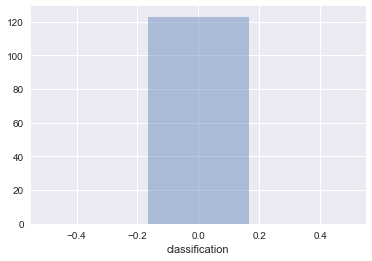

In [114]:
# sort by classificaion
df['classification'] = df.apply(lambda row: int(row[T] - row['t0']), axis=1)
class_grps = df.groupby('classification')
print(class_grps.count()['url']) # doesnt matter which index we use -- they are all equal

# plot histogram of number of pos and neg
classificaions = df['classification']
sns.distplot(classificaions, bins=3, kde=False)

In [115]:
# plot average classification per source
source_dist = df.groupby('source').count()
print(source_dist['classification'])

source
bloomberg       56
investopedia    10
reuters         37
seekingalpha    20
Name: classification, dtype: int64


**Article Metrics**

One of the main aspects of this study is aggregating articles published by reputable news sources. Therefore, this section serves to make sure that the data we are getting is correct and that the web parser/scraper is working for the inputted sources. If you see some sources are not represented as you would expect, check for error in how Stocker parsed the values found from the associated quereis. Debugging `/data/output.log` could offer some insight. 

In [151]:
# average article length in general

# we need to split the article by the space value to get a list of words 
df['article_len'] = df.apply(lambda row: len(row['article'].split(' ')), axis=1)

# show the first 5 entries to ensure things look right
#print(df.head())

print('Average article length is {} words'.format(df['article_len'].mean()))

Average article length is 672.4634146341464 words


In [152]:
# plot average article length by source

# change to the sources used to fill in examples.csv
#sources = ['seekingalpha', 'bloomberg', 'reuters', 'businessinsider', 'investopedia']  

source_dist = df.groupby('source')
print(source_dist.mean()['article_len'])

source
bloomberg        597.392857
investopedia     526.600000
reuters          435.621622
seekingalpha    1393.750000
Name: article_len, dtype: float64


**Source Metrics**

Now we look at how well Stocker handles each source by analyzing their accuracy. I define their accuracy by finding the number of URLs found per each source query divided by the number of Web Nodes writen to disk (examples) for each query with the source as input.

In [166]:
source_stats_df = pd.read_json(json.dumps(stats_data)).transpose()
source_stats_df.columns = ['Nodes', 'Urls']

source_stats_df['Accuracy'] = source_stats_df.apply(
                    lambda row: row['Nodes'] / row['Urls'], axis=1)

# print the stats data frame
source_stats_df


,Nodes,Urls,Accuracy
bloomberg,58,30,1.933333
businessinsider,0,28,0.000000
investopedia,12,40,0.300000
reuters,48,40,1.200000
seekingalpha,20,28,0.714286
